# Dfsu - Distance to land
Calculate the distance to land for each element in mesh and save to dfsu file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams["figure.figsize"] = (6,6)

from mikeio import Dfsu, Mesh

In [2]:
meshfilename = r"../tests/testdata/odense_rough.mesh"
msh = Mesh(meshfilename)
msh

Number of elements: 654
Number of nodes: 399
Projection: UTM-33

<AxesSubplot:>

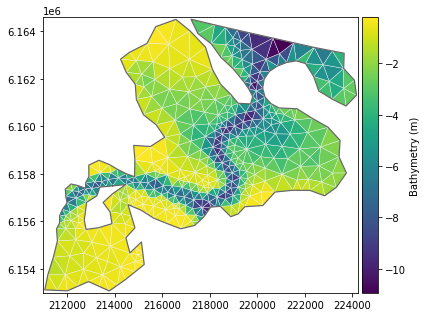

In [3]:
msh.plot()

# Modify z values

In [4]:
zn = msh.node_coordinates[:,2]
new_zn = zn - 10
msh.zn = new_zn

newfilename = "new_mesh.mesh"
msh.write(newfilename)

Read the new file to verify the modification.

<AxesSubplot:>

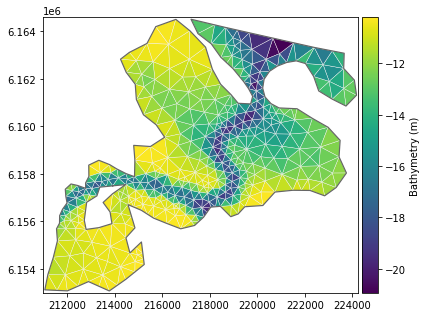

In [5]:
msh = Mesh(newfilename)
msh.plot()

# Get a list of land nodes

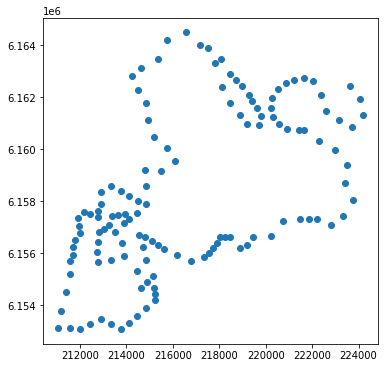

In [6]:
ncland = msh.node_coordinates[msh.codes==1]

plt.scatter(ncland[:,0], ncland[:,1])

# Get element coordinates

In [7]:
ec = msh.element_coordinates

# Calculate distance to nearest land node

In [8]:
i = 0
ne = ec.shape[0]
d = np.zeros(ne)

for i in range(ne):
    d[i] = np.min(np.sqrt((ec[i,0] - ncland[:,0])**2 + (ec[i,1] -ncland[:,1])**2))

<AxesSubplot:>

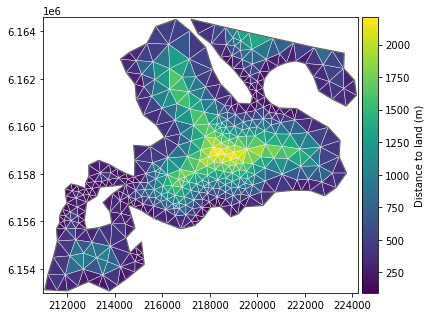

In [9]:
msh.plot(z=d,label="Distance to land (m)")

# Store result in a new Dfsu file

In [10]:
d2d = np.atleast_2d(d)
d2d.shape

(1, 654)

In [11]:
from mikeio import Dataset
from mikeio.eum import ItemInfo

dfs = Dfsu(meshfilename)
dfsufilename = "distance.dfsu"

ds = Dataset(data=[d2d], time=pd.date_range("2000",periods=1, freq='H'), items=[ItemInfo("Distance to land")])
dfs.write(dfsufilename, ds)

# Clean up

In [12]:
import os
os.remove(dfsufilename)
os.remove(newfilename)